In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import tensorflow as tf
import keras
from keras.preprocessing.image import load_img
import string
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from PIL import Image
#used for creating Progress Meters or Progress Bars
from tqdm import tqdm

import glob
from gtts import gTTS
from playsound import playsound
from IPython import display
import collections
import wordcloud
from wordcloud import WordCloud, STOPWORDS


In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/cluster/home/guillera/mode_3_medical/isu-chest-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/indiana_projections.txt
/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/indiana_reports.csv
/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/indiana_projections.csv
/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/ireport.txt
/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/happy_dog.jpg
/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/B2DBy.jpg
/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/gray.jpeg
/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/test/2_IM-0652-1001.dcm.png
/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/test/3_IM-1384-2001.dcm.png
/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/1700_IM-0462-1001.dcm.png
/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/1295_IM-0194-3003.dcm.png
/cluster/home/guillera/mode_3_medical/isu-chest-data/arch

In [3]:
images='/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized'
all_imgs = glob.glob(images + '/*.png',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 7470


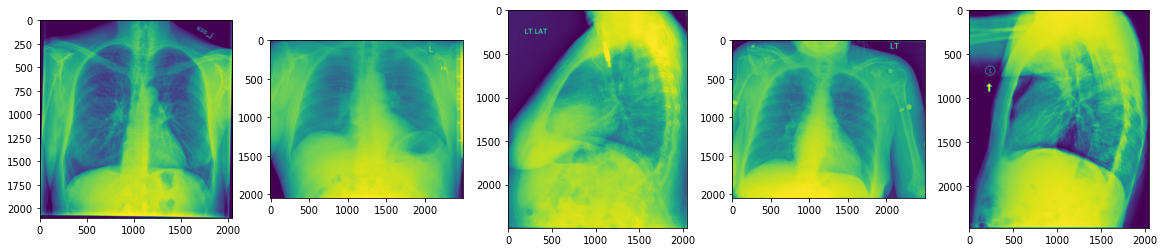

In [4]:
import imageio
#Visualising first 5 images :
Display_Images = all_imgs[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)
for ax, image in zip(axes, Display_Images):
  ax.imshow(imageio.imread(image), cmap=None)

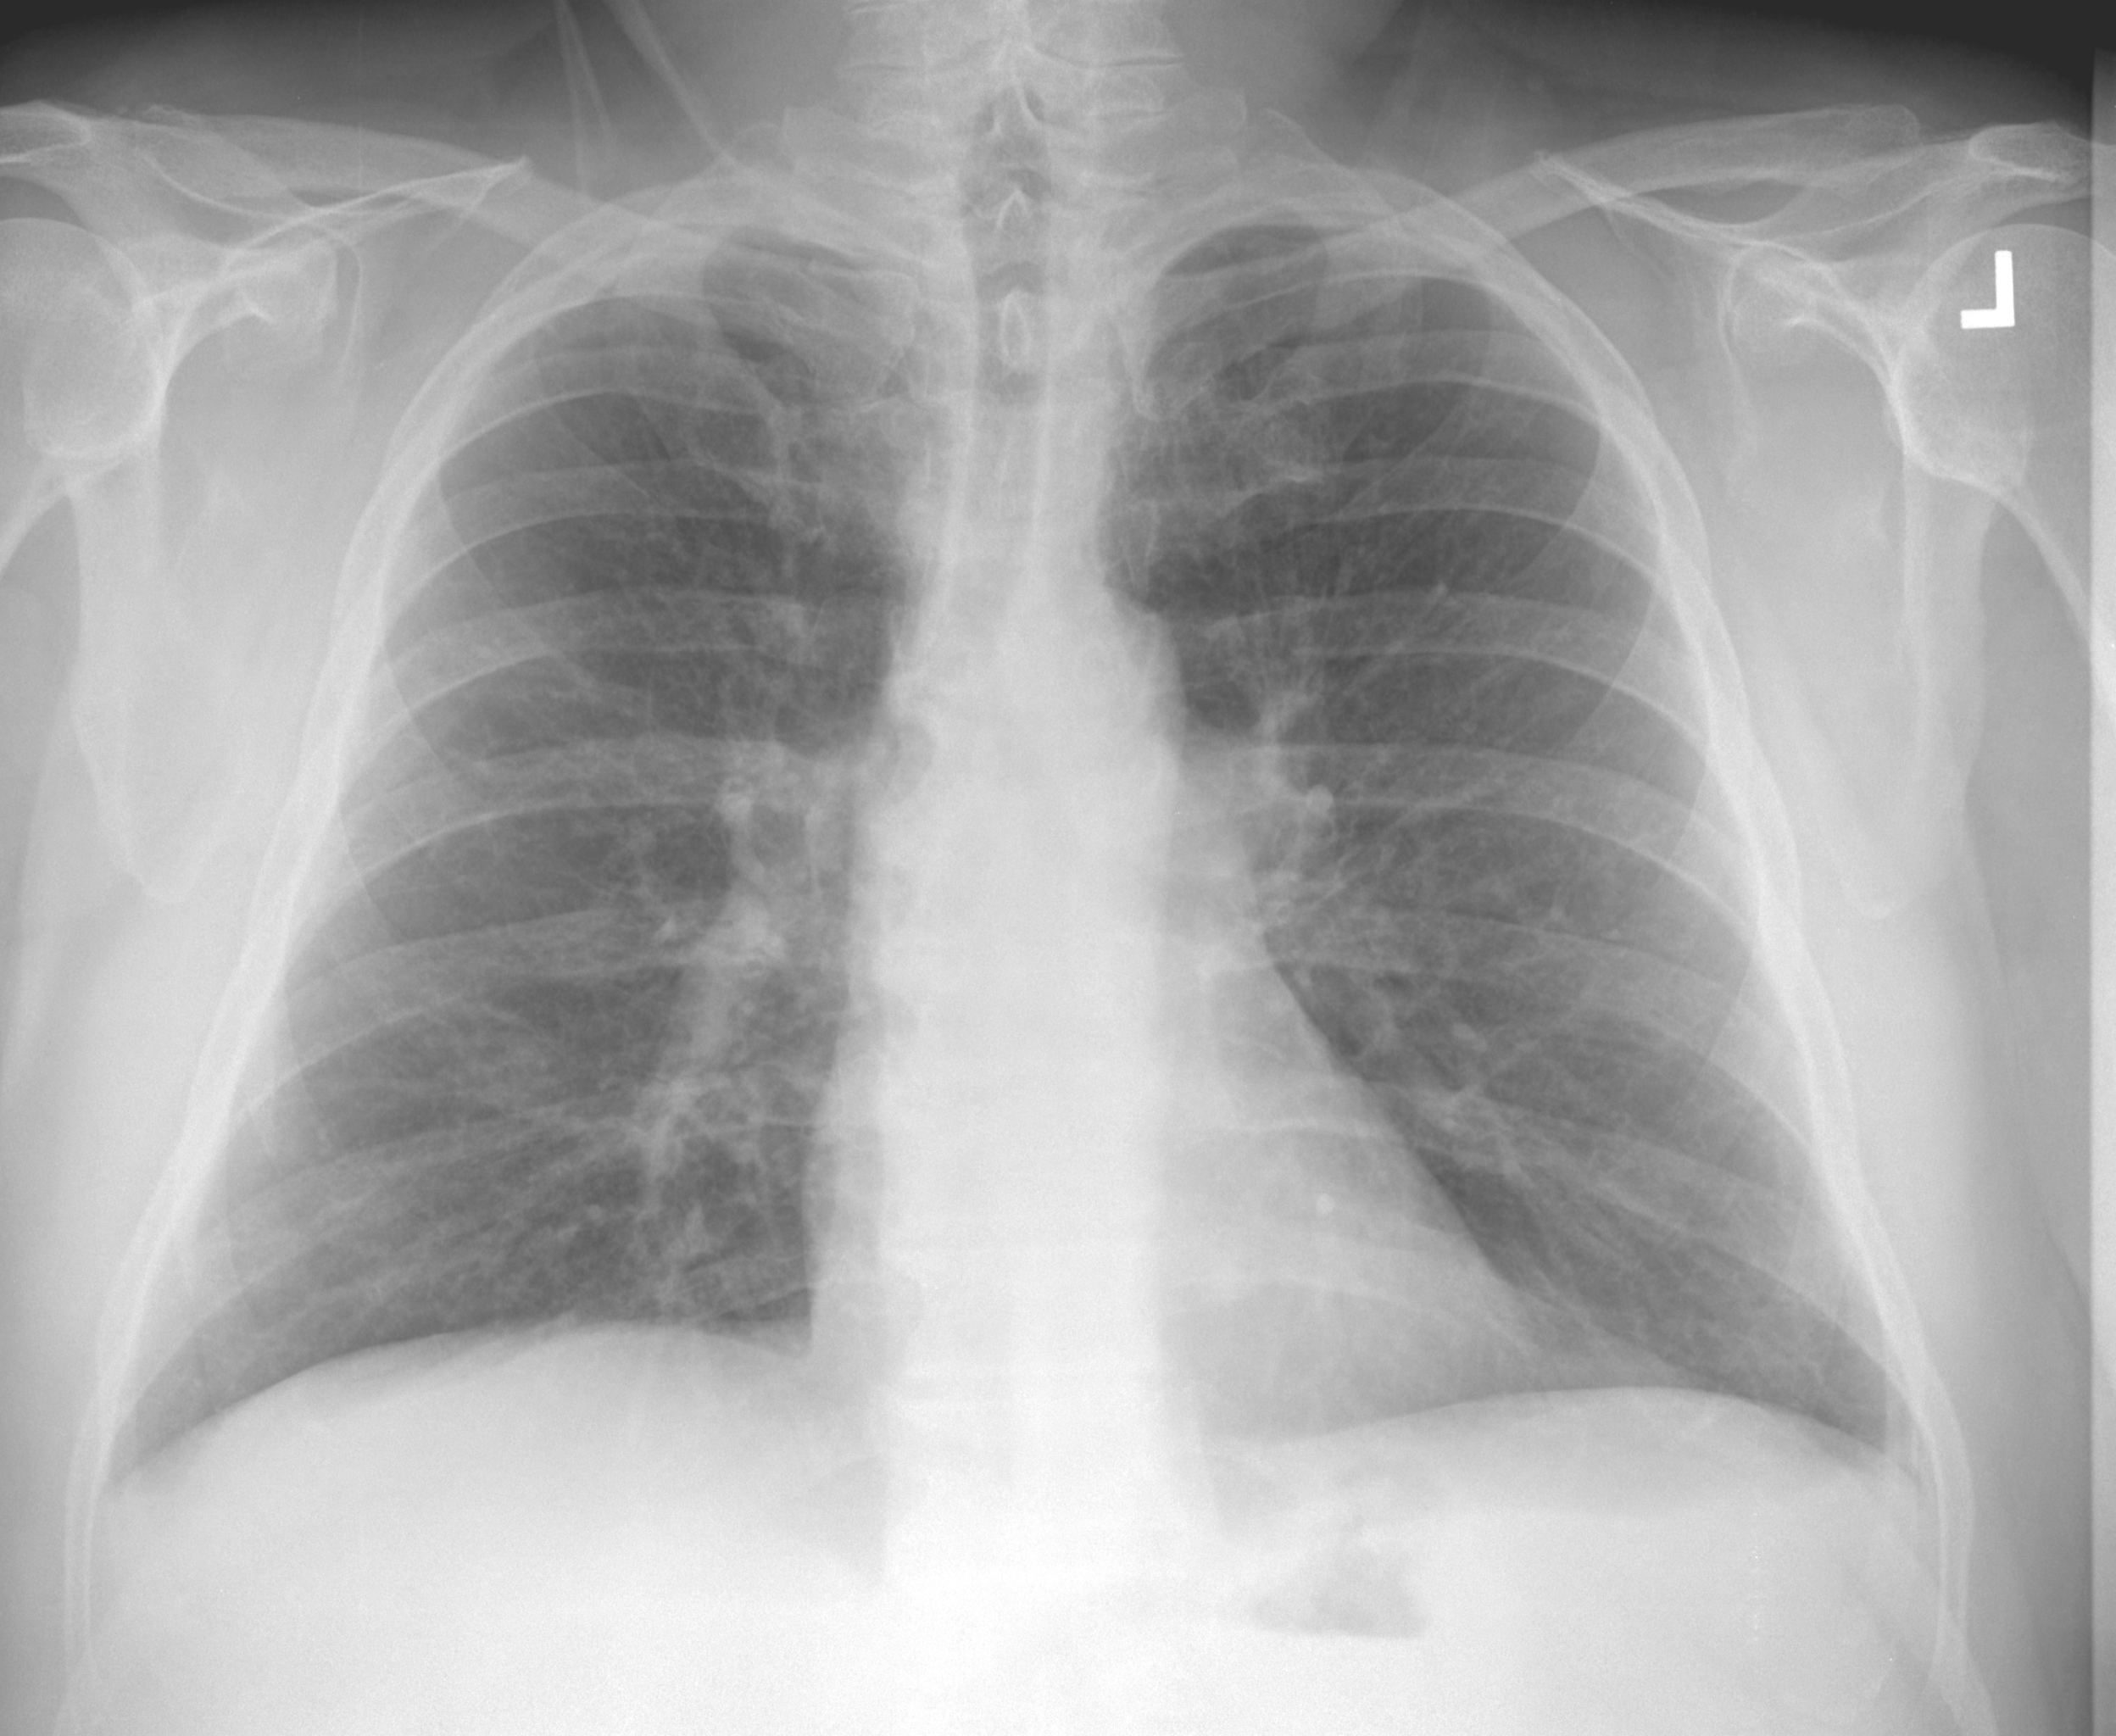

In [5]:
import random
Image.open(all_imgs[random.randrange(40, 60, 3)])# view a random image
import random
Image.open(all_imgs[random.randrange(40, 60, 3)])

In [6]:
text_file = '/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/ireport.txt'
def load_doc(filename):
    open_file = open(text_file, 'r', encoding='latin-1' ) 
    text = open_file.read() 
    open_file.close()
    return text
doc = load_doc(text_file)
print(doc[:100000])

uid,MeSH,Problems,image,indication,comparison,findings,impression
1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.,Normal chest x-XXXX.
2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XXXX. Enlarged pulmonary arteries. Clear lungs. Inferior XXXX XXXX XXXX.,No acute pulmonary findings.
3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XXXX. Pain to R back, R elbow and R rib XXXX, no previous heart or lung hx, non-XXXX, no hx ca",,,"No displaced rib fractures, pneumothorax, or pleural effusion identified. Well-expanded and clear lungs. Mediastinal contour within normal limits. No acut

In [7]:
img_path = '/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/'
#img_path2 = '/cluster/home/guillera/IntegrationProject/archive/Images/'
#From the ireport.txt file
all_img_uid = []
all_img_mesh = [] 
all_img_problems = [] 
all_img_image_type = []
all_img_indications = []
all_img_comparison = []
all_img_findings = []
all_img_impression = []
#From the indiana_projections.txt file
all_img_uid2 = []
all_img_vector = []
all_img_projection = []

noFrontalProjection = []

all_img_id2 = [] 
all_img_vector2 = [] 
annotations = [] 

with open('/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/indiana_projections.txt' , 'r') as fo_pr:
  next(fo_pr) 
  memoria = 0
  for line in fo_pr :
    split_arr = line.split(',')
    if(memoria != split_arr[0]):
      memoria = split_arr[0]
      all_img_uid2.append(split_arr[0])
      all_img_projection.append(split_arr[2].rstrip('\n.')) #removing out the \n.
      all_img_vector.append(img_path+split_arr[1])

with open('/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/ireport.txt' , 'r') as fo:
  next(fo) 
  contador = 0
  for line in fo :
    split_arr = line.split(',')
    all_img_uid.append(split_arr[0])
    all_img_mesh.append(split_arr[1]) 
    all_img_problems.append(split_arr[2])
    all_img_image_type.append(split_arr[3])
    all_img_indications.append(split_arr[4])
    all_img_comparison.append(split_arr[5])
    all_img_findings.append(split_arr[6])
    all_img_impression.append(split_arr[7].rstrip('\n.')) #removing out the \n.


df = pd.DataFrame(list(zip(all_img_uid, all_img_mesh, all_img_problems, all_img_image_type, all_img_indications, all_img_comparison, all_img_findings, all_img_impression)),columns =['uid', 'MeSH', 'problems', 'image','indication', 'comparison', 'findings', 'impression'])
df_pr = pd.DataFrame(list(zip(all_img_uid2, all_img_vector, all_img_projection)),columns =['uid', 'Path', 'projection'])  

df_pr.Path[0]

'/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/1_IM-0001-4001.dcm.png'

In [8]:
print("Total captions present in the dataset: "+ str(len(all_img_problems)))
print("Total images present in the dataset: " + str(len(all_img_vector)))

Total captions present in the dataset: 3851
Total images present in the dataset: 3851


In [9]:
vocabulary = [word.lower() for line in all_img_problems for word in line.split()]
val_count = Counter(vocabulary) 
val_count

Counter({'normal': 1379,
         'cardiomegaly;pulmonary': 20,
         'artery': 5,
         'chronic': 44,
         'obstructive;bullous': 1,
         'emphysema;pulmonary': 3,
         'fibrosis/interstitial;cicatrix/lung/upper': 1,
         'lobe/left;opacity/lung/apex/left/irregular;opacity/lung/upper': 1,
         'lobe/right/streaky;opacity/pulmonary': 1,
         'alveoli;opacity/lung/bilateral/interstitial/diffuse"': 1,
         'osteophyte;thickening;lung': 1,
         'pulmonary': 57,
         'atelectasis;spondylosis;arthritis': 1,
         'calcified': 165,
         'granuloma;density': 2,
         'granuloma': 133,
         'cardiac': 24,
         'shadow': 9,
         'lung;markings': 13,
         'granulomatous': 36,
         'disease': 88,
         'pleural': 24,
         'effusion': 41,
         'thoracic/tortuous;thoracic': 2,
         'vertebrae/degenerative"': 8,
         'granuloma;breast': 1,
         'implants;deformity': 1,
         'hyperlucent;lung/hyperdist

normal :  1379
calcified :  165
vertebrae :  151
granuloma :  133
atelectasis :  96
no :  92
indexing :  92
thoracic :  89
disease :  88
lung :  86
medical :  78
quality :  74
of :  74
image :  74
unsatisfactory :  74
pulmonary :  57
instruments :  50
chronic :  44
effusion :  41
spine :  41
surgical :  40
device :  38
granulomatous :  36
calcinosis :  36
opacity :  35
technical :  32
cardiomegaly :  29
scoliosis :  28
opacity;pulmonary :  25
obstructive" :  25


Text(0, 0.5, 'Count')

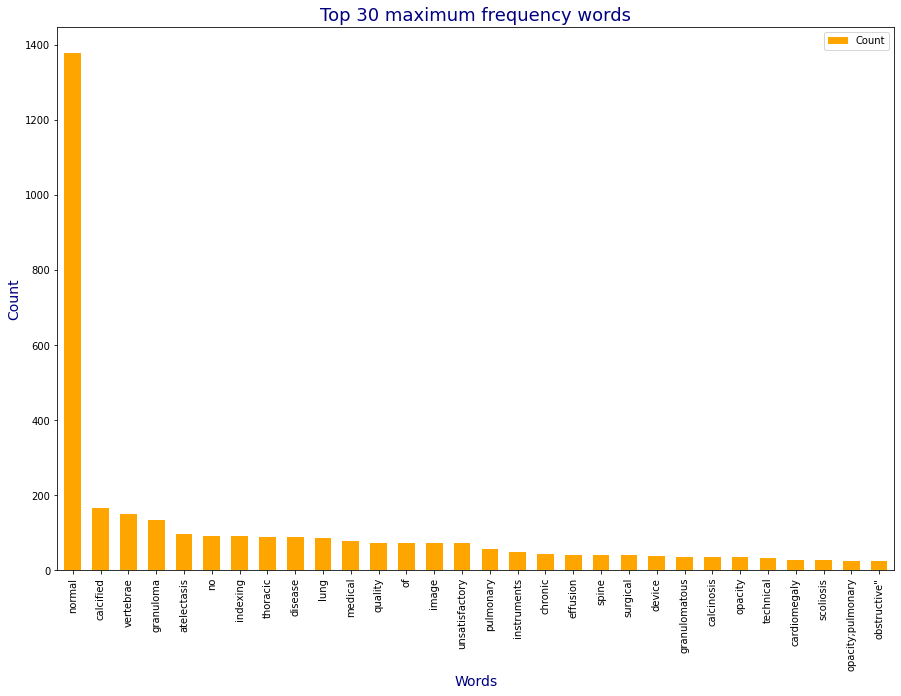

In [10]:
#Visualise the top 30 occuring words in the captions
for word, count in val_count.most_common(30):
  print(word, ": ", count)

lst = val_count.most_common(30)
most_common_words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word', y='Count', width=0.6, color='orange', figsize=(15, 10))
plt.title("Top 30 maximum frequency words", fontsize = 18, color= 'navy')
plt.xlabel("Words", fontsize = 14, color= 'navy')
plt.ylabel("Count", fontsize = 14, color= 'navy')

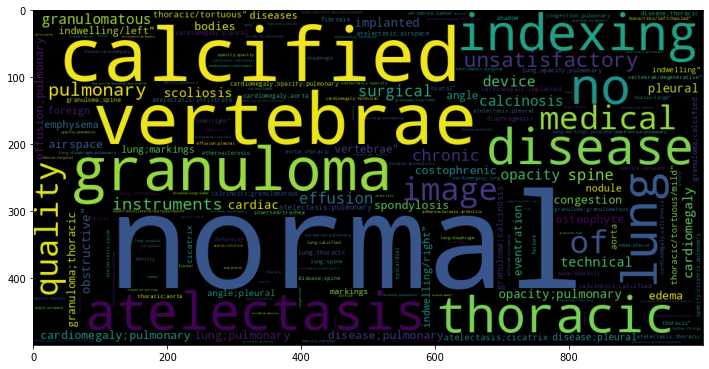

In [11]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(val_count)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

12
11


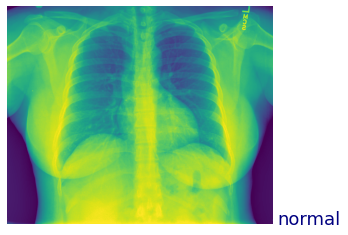

In [12]:
def caption_with_img_plot(image_id, frame) :
  print(image_id)
  capt = ("\n" *2).join(frame[frame['uid'] == image_id].problems.to_list())
  fig, ax = plt.subplots()
  ax.set_axis_off()
  idx = df_pr.uid.to_list().index(image_id)
  print(idx)
  im =  Image.open(df_pr.Path.iloc[idx])
  w, h = im.size[0], im.size[-1]
  ax.imshow(im)
  ax.text(w+50, h, capt, fontsize = 18, color = 'navy')
caption_with_img_plot(df_pr.uid.iloc[11], df)


In [13]:
#data cleaning
rem_punct = str.maketrans('', '', string.punctuation)
for r in range(len(all_img_problems)) :
  line = all_img_problems[r]
  line = line.split(";")

  # converting to lowercase
  line = [word.lower() for word in line]

  # remove punctuation from each caption and hanging letters
  #line = [word.translate(rem_punct) for word in line]
  #line = [word for word in line if len(word) > 1]

  # remove numeric values
  #line = [word for word in line if word.isalpha()]

  all_img_problems[r] = ' '.join(line)

In [14]:
#add the <start> & <end> token to all those captions as well
annotations = ['<start>' + ' ' + line + ' ' + '<end>' for line in all_img_problems]

#Create a list which contains all the path to the images
all_img_path = all_img_vector

In [15]:
##Example of how the list containing all the problems looks
annotations[0:5]

['<start> normal <end>',
 '<start> cardiomegaly pulmonary artery <end>',
 '<start> normal <end>',
 '<start>  chronic obstructive bullous emphysema pulmonary fibrosis/interstitial cicatrix/lung/upper lobe/left opacity/lung/apex/left/irregular opacity/lung/upper lobe/right/streaky opacity/pulmonary alveoli opacity/lung/bilateral/interstitial/diffuse" <end>',
 '<start> osteophyte thickening lung <end>']

In [16]:
# Creating the tokenizer
top_word_cnt = 5000
tokenizer = Tokenizer(num_words = top_word_cnt+1, filters= '!"#$%^&*()_+.,:;-?/~`{}[]|\=@ ',
                      lower = True, char_level = False, 
                      oov_token = 'UNK')

In [17]:
# Creating word-to-index and index-to-word mappings.

tokenizer.fit_on_texts(annotations)
#transform each text into a sequence of integers
train_seqs = tokenizer.texts_to_sequences(annotations)

In [18]:
# We add PAD token for zero
tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'

In [19]:
print(tokenizer.oov_token)
print(tokenizer.index_word[0])

UNK
PAD


In [20]:
tokenizer.index_word

{0: 'PAD',
 1: 'UNK',
 2: '<start>',
 3: '<end>',
 4: 'normal',
 5: 'lung',
 6: 'pulmonary',
 7: 'opacity',
 8: 'thoracic',
 9: 'vertebrae',
 10: 'atelectasis',
 11: 'granuloma',
 12: 'cardiomegaly',
 13: 'calcinosis',
 14: 'calcified',
 15: 'disease',
 16: 'cicatrix',
 17: 'spine',
 18: 'aorta',
 19: 'markings',
 20: 'right',
 21: 'effusion',
 22: 'pleural',
 23: 'left',
 24: 'diaphragm',
 25: 'density',
 26: 'scoliosis',
 27: 'indwelling',
 28: 'airspace',
 29: 'nodule',
 30: 'granulomatous',
 31: 'deformity',
 32: 'surgical',
 33: 'instruments',
 34: 'emphysema',
 35: 'no',
 36: 'indexing',
 37: 'atherosclerosis',
 38: 'mild',
 39: 'medical',
 40: 'device',
 41: 'bone',
 42: 'tortuous',
 43: 'technical',
 44: 'quality',
 45: 'of',
 46: 'image',
 47: 'unsatisfactory',
 48: 'bilateral',
 49: 'costophrenic',
 50: 'angle',
 51: 'osteophyte',
 52: 'implanted',
 53: 'spondylosis',
 54: 'congestion',
 55: 'infiltrate',
 56: 'chronic',
 57: 'ribs',
 58: 'base',
 59: 'degenerative',
 60: 'sh

In [21]:
# Creating a word count for our tokenizer to visualize the Top 30 occuring words after text processing

tokenizer_top_words = [word for line in annotations for word in line.split() ]

#tokenizer_top_words_count
tokenizer_top_words_count = collections.Counter(tokenizer_top_words)

<start> :  3851
<end> :  3851
normal :  1379
pulmonary :  468
lung :  445
opacity :  407
granuloma :  286
cardiomegaly :  283
atelectasis :  265
thoracic :  262
calcinosis :  254
calcified :  253
vertebrae :  240
disease :  191
cicatrix :  159
markings :  145
aorta :  143
pleural :  141
spine :  141
effusion :  120
diaphragm :  110
airspace :  107
granulomatous :  99
nodule :  99
density :  98
scoliosis :  98
surgical :  95
no :  92
indexing :  92
instruments :  88


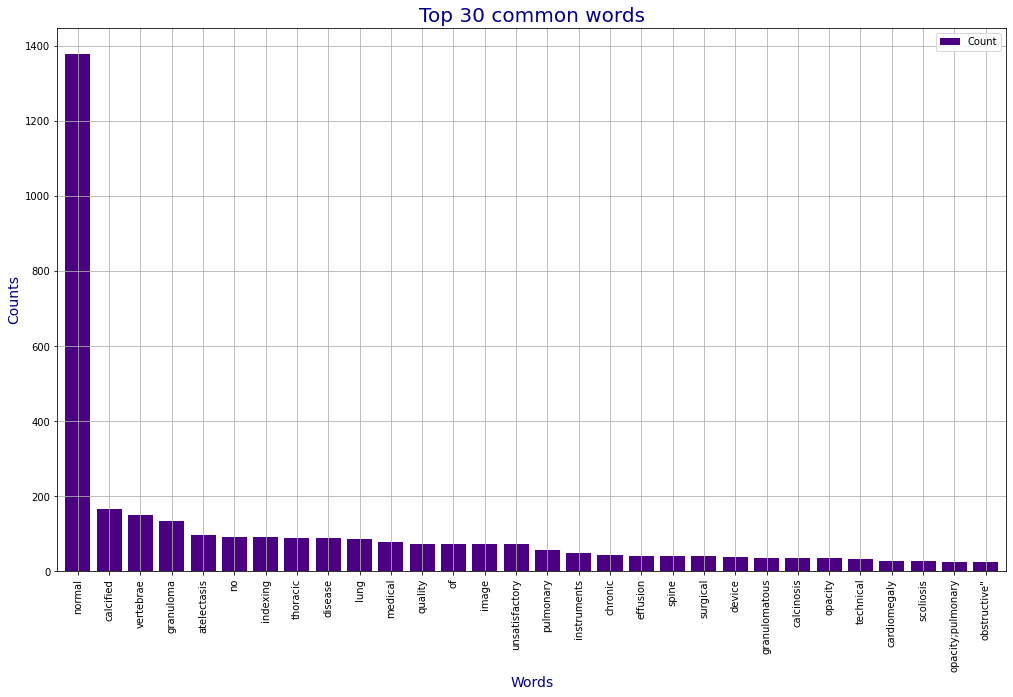

In [22]:
for word, count in tokenizer_top_words_count.most_common(30) :
  print(word, ": ", count)

tokens = tokenizer_top_words_count.most_common(30)
most_com_words_df = pd.DataFrame(tokens, columns = ['Word', 'Count'])

#plot 30 most common words
most_common_words_df.plot.bar(x = 'Word', y= 'Count', width=0.8, color = 'indigo', figsize = (17, 10))
plt.title('Top 30 common words', fontsize =20, color= 'navy')
plt.xlabel('Words', fontsize =14, color= 'navy')
plt.ylabel('Counts', fontsize =14, color= 'navy')
plt.grid(b=None)

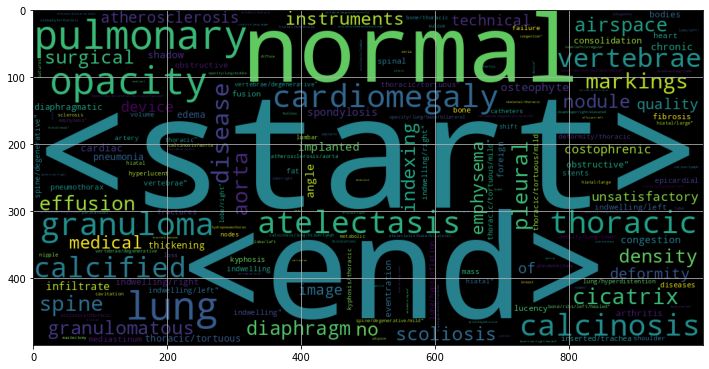

In [23]:
wordcloud_token = WordCloud(width = 1000, height = 500).generate_from_frequencies(tokenizer_top_words_count)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud_token)
plt.grid(b = None)

In [24]:
# Pad each vector to the max_length of the captions  store it to a vairable

train_seqs_len = [len(seq) for seq in train_seqs]

longest_word_length = max(train_seqs_len)

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding= 'post', maxlen = longest_word_length,
                                                          dtype='int32', value=0)
print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(3851, 33)


In [25]:
# creating list to store preprocessed images and setting up the Image Shape

preprocessed_image = []
IMAGE_SHAPE = (299, 299)

In [26]:
#checking image format 

tf.keras.backend.image_data_format()

'channels_last'

In [27]:
for img in all_img_vector[0:5] :
    img = tf.io.read_file(img, name=None)
    img = tf.image.decode_jpeg(img, channels=0)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    preprocessed_image.append(img)

Shape after resize :  (299, 299, 1)
Shape after resize :  (299, 299, 1)
Shape after resize :  (299, 299, 1)
Shape after resize :  (299, 299, 1)
Shape after resize :  (299, 299, 1)


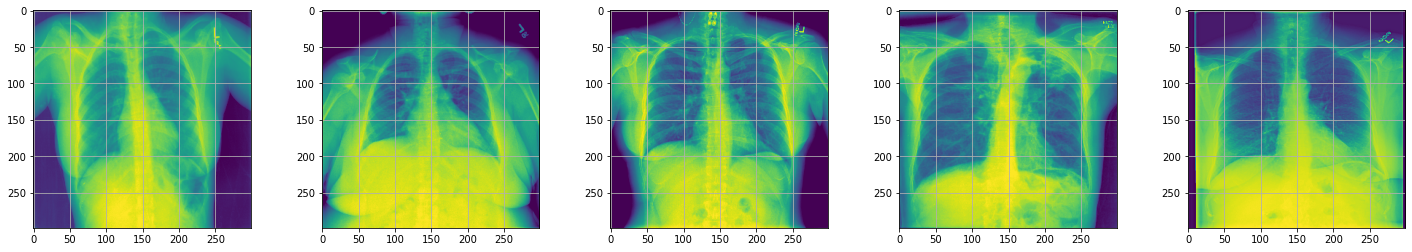

In [28]:
# checking first five images post preprocessing
Display_Images = preprocessed_image[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(25)
for ax, image in zip(axes, Display_Images) :
  print('Shape after resize : ', image.shape)
  ax.imshow(image)
  ax.grid('off')

In [29]:
def load_images(image_path) :
  img = tf.io.read_file(image_path, name = None)
  img = tf.image.decode_jpeg(img, channels=0)
  img = tf.image.resize(img, IMAGE_SHAPE)
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img, image_path
load_images

<function __main__.load_images>

In [30]:
all_img_vector

['/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/1_IM-0001-4001.dcm.png',
 '/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/2_IM-0652-1001.dcm.png',
 '/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/3_IM-1384-1001.dcm.png',
 '/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/4_IM-2050-1001.dcm.png',
 '/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/5_IM-2117-1003002.dcm.png',
 '/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/6_IM-2192-1001.dcm.png',
 '/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/7_IM-2263-1001.dcm.png',
 '/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/8_IM-2333-1001.dcm.png',
 '/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/9_IM-

In [31]:
# Map each image full path to the function, in order to preprocess the image
training_list = sorted(set(all_img_vector))
New_Img = tf.data.Dataset.from_tensor_slices(training_list)
New_Img = New_Img.map(load_images, num_parallel_calls = tf.data.experimental.AUTOTUNE)
New_Img = New_Img.batch(64, drop_remainder=False)
print(New_Img)

<BatchDataset shapes: ((None, 299, 299, None), (None,)), types: (tf.float32, tf.string)>


In [32]:
#Ratio = 80:20 and we will set random state = 42
path_train, path_test, caption_train, caption_test = train_test_split(all_img_vector, cap_vector, test_size = 0.2, random_state = 42)

In [33]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 3080
Testing data for images: 771
Training data for Captions: 3080
Testing data for Captions: 771


In [34]:

image_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top = False)
input_tensor = Input(shape=(299,299,1))
x = tf.keras.layers.Conv2D(3,(3,3),padding='same')(input_tensor)    # x has a dimension of (img_height,img_width,3)
out1 = image_model(x)
#out = tf.keras.layers.Dense(10, activation = 'softmax')(out1)

image_features_extract_model = tf.compat.v1.keras.Model(inputs = input_tensor, outputs = out1)


#resnet = tf.keras.applications.InceptionV3(weights='imagenet',include_top= 'False') 

#input_tensor = Input(shape=(299,299,1) )
#x = tf.keras.layers.Conv2D(3,(3,3),padding='same')(input_tensor)    # x has a dimension of (IMG_SIZE,IMG_SIZE,3)
#out1 = resnet (x) 

#image_features_extract_model = tf.compat.v1.keras.Model(inputs=input_tensor,outputs=out)



#image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
#new_input = image_model.input 
#hidden_layer = image_model.layers[-1].output  
#image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)

In [35]:
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)
image_features_extract_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 1)]     0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 299, 299, 3)       30        
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
Total params: 21,802,814
Trainable params: 21,768,382
Non-trainable params: 34,432
_________________________________________________________________


In [36]:
# extract features from each image in the dataset
img_features = {}
for image, image_path in tqdm(New_Img) :
  batch_features = image_features_extract_model(image)
  #squeeze out the features in a batch
  batch_features_flattened = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))
  
  for batch_feat, path in zip(batch_features_flattened, image_path) :
    feature_path = path.numpy().decode('utf-8')
    img_features[feature_path] = batch_feat.numpy()

100%|██████████| 61/61 [02:25<00:00,  2.39s/it]


In [37]:
batch_features
batch_features_flattened
batch_feat.shape

TensorShape([64, 2048])

In [38]:
#view top five items of img_features dict
import more_itertools
top_5 = more_itertools.take(5, img_features.items())
top_5

[('/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/1000_IM-0003-1001.dcm.png',
  array([[0.7285274 , 0.42723426, 0.        , ..., 0.6497961 , 0.7505401 ,
          0.        ],
         [0.27281612, 0.        , 0.        , ..., 0.5775041 , 0.6435454 ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.19222677, 0.07299902,
          0.19237894],
         ...,
         [0.00402653, 0.5369085 , 0.        , ..., 1.4789388 , 0.20724064,
          0.        ],
         [0.        , 0.        , 0.        , ..., 1.6547753 , 0.24081512,
          0.        ],
         [0.54750204, 0.        , 0.        , ..., 1.4539713 , 0.20033398,
          0.        ]], dtype=float32)),
 ('/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/images/images_normalized/1001_IM-0004-1001.dcm.png',
  array([[0.        , 0.        , 0.        , ..., 0.        , 0.98796713,
          0.        ],
         [0.3643999 , 0.        , 0.00171843, ..

In [39]:
def map(image_name, caption):
    img_tensor = img_features[image_name.decode('utf-8')]
    return img_tensor, caption

In [40]:
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier
BUFFER_SIZE = 1000
BATCH_SIZE = 64
def gen_dataset(img, capt):
        
    data = tf.data.Dataset.from_tensor_slices((img, capt))
    data = data.map(lambda ele1, ele2 : tf.numpy_function(map, [ele1, ele2], [tf.float32, tf.int32]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE)
    
     
    data = (data.shuffle(BUFFER_SIZE, reshuffle_each_iteration= True).batch(BATCH_SIZE, drop_remainder = False)
    .prefetch(tf.data.experimental.AUTOTUNE))
    return data

In [41]:
train_dataset = gen_dataset(path_train,caption_train)
test_dataset = gen_dataset(path_test,caption_test)

In [42]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 64, 2048)
(64, 33)


In [43]:
# Setting  parameters

embedding_dim = 256 
units = 512

#top 5,000 words +1
vocab_size = 5001
train_num_steps = len(path_train) // BATCH_SIZE 
test_num_steps = len(path_test) // BATCH_SIZE  

max_length = 31
feature_shape = batch_feat.shape[1]
attention_feature_shape = batch_feat.shape[0]

In [44]:
tf.compat.v1.reset_default_graph()
print(tf.compat.v1.get_default_graph())

In [45]:
#Building Encoder using CNN Keras subclassing method

class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features =  tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0)
        return features

In [46]:
encoder=Encoder(embedding_dim)
from keras.utils.vis_utils import plot_model

In [47]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) 
        self.W2 = tf.keras.layers.Dense(units) 
        self.V = tf.keras.layers.Dense(1) 
        self.units=units

    def call(self, features, hidden):
        hidden_with_time_axis = hidden[:, tf.newaxis]
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))  
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1) 
        context_vector = attention_weights * features 
        context_vector = tf.reduce_sum(context_vector, axis=1)  
        return context_vector, attention_weights

In [48]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis = -1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output, state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [49]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [50]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


In [51]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)  #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = tf.keras.losses.Reduction.NONE) #define your loss object

In [52]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    #loss is getting multiplied with mask to get an ideal shape
    
    return tf.reduce_mean(loss_)

In [53]:
checkpoint_path = "/cluster/home/guillera/mode_3_medical/checkpoint1"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [54]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [55]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        
        encoder_op = encoder(img_tensor)
        for r in range(1, target.shape[1]) :
          predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
          loss = loss + loss_function(target[:, r], predictions) 
          dec_input = tf.expand_dims(target[:, r], 1)  

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))

    return loss, avg_loss

In [56]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size = target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
      encoder_op = encoder(img_tensor)
      for r in range(1, target.shape[1]) :
        predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
        loss = loss + loss_function(target[:, r], predictions)
        dec_input = tf.expand_dims(target[: , r], 1)
    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))                      
    return loss, avg_loss

In [57]:
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(test_dataset) :
      batch_loss, t_loss = test_step(img_tensor, target)
      total_loss = total_loss + t_loss
      avg_test_loss = total_loss/ test_num_steps

    return avg_test_loss

In [58]:
loss_plot = []
test_loss_plot = []
EPOCHS = 20
best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps   
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/20 [00:00<?, ?it/s]

For epoch: 1, the train loss is 0.498, & test loss is 0.417
Time taken for 1 epoch 225.32712364196777 sec

Test loss has been reduced from 100.000 to 0.417


 10%|█         | 2/20 [04:36<36:53, 122.97s/it]  

For epoch: 2, the train loss is 0.386, & test loss is 0.355
Time taken for 1 epoch 50.897104263305664 sec

Test loss has been reduced from 0.417 to 0.355
For epoch: 3, the train loss is 0.336, & test loss is 0.313
Time taken for 1 epoch 50.65682792663574 sec

Test loss has been reduced from 0.355 to 0.313


 20%|██        | 4/20 [06:18<19:51, 74.48s/it] 

For epoch: 4, the train loss is 0.307, & test loss is 0.315
Time taken for 1 epoch 50.6210298538208 sec

For epoch: 5, the train loss is 0.291, & test loss is 0.284
Time taken for 1 epoch 50.44133806228638 sec

Test loss has been reduced from 0.313 to 0.284


 30%|███       | 6/20 [07:58<14:06, 60.45s/it]

For epoch: 6, the train loss is 0.271, & test loss is 0.289
Time taken for 1 epoch 49.79122042655945 sec

For epoch: 7, the train loss is 0.263, & test loss is 0.238
Time taken for 1 epoch 50.19444417953491 sec

Test loss has been reduced from 0.284 to 0.238


 40%|████      | 8/20 [09:39<10:58, 54.89s/it]

For epoch: 8, the train loss is 0.255, & test loss is 0.254
Time taken for 1 epoch 49.91403007507324 sec



 45%|████▌     | 9/20 [10:29<09:46, 53.31s/it]

For epoch: 9, the train loss is 0.246, & test loss is 0.226
Time taken for 1 epoch 49.66316628456116 sec

Test loss has been reduced from 0.238 to 0.226


 50%|█████     | 10/20 [11:18<08:40, 52.05s/it]

For epoch: 10, the train loss is 0.234, & test loss is 0.226
Time taken for 1 epoch 49.23883819580078 sec



 55%|█████▌    | 11/20 [12:07<07:41, 51.23s/it]

For epoch: 11, the train loss is 0.229, & test loss is 0.236
Time taken for 1 epoch 49.346378326416016 sec



 60%|██████    | 12/20 [12:57<06:45, 50.65s/it]

For epoch: 12, the train loss is 0.223, & test loss is 0.222
Time taken for 1 epoch 49.12717294692993 sec

Test loss has been reduced from 0.226 to 0.222


 65%|██████▌   | 13/20 [13:46<05:51, 50.26s/it]

For epoch: 13, the train loss is 0.210, & test loss is 0.193
Time taken for 1 epoch 49.22624063491821 sec

Test loss has been reduced from 0.222 to 0.193


 70%|███████   | 14/20 [14:35<04:59, 49.84s/it]

For epoch: 14, the train loss is 0.196, & test loss is 0.189
Time taken for 1 epoch 48.66450881958008 sec

Test loss has been reduced from 0.193 to 0.189


 75%|███████▌  | 15/20 [15:25<04:09, 49.98s/it]

For epoch: 15, the train loss is 0.186, & test loss is 0.168
Time taken for 1 epoch 50.14697289466858 sec

Test loss has been reduced from 0.189 to 0.168


 80%|████████  | 16/20 [16:14<03:19, 49.80s/it]

For epoch: 16, the train loss is 0.172, & test loss is 0.157
Time taken for 1 epoch 49.222912073135376 sec

Test loss has been reduced from 0.168 to 0.157


 85%|████████▌ | 17/20 [17:04<02:28, 49.65s/it]

For epoch: 17, the train loss is 0.167, & test loss is 0.158
Time taken for 1 epoch 49.311073541641235 sec



 90%|█████████ | 18/20 [17:53<01:39, 49.63s/it]

For epoch: 18, the train loss is 0.160, & test loss is 0.160
Time taken for 1 epoch 49.568466663360596 sec



 95%|█████████▌| 19/20 [18:43<00:49, 49.62s/it]

For epoch: 19, the train loss is 0.155, & test loss is 0.146
Time taken for 1 epoch 49.41072988510132 sec

Test loss has been reduced from 0.157 to 0.146


100%|██████████| 20/20 [19:33<00:00, 58.66s/it]

For epoch: 20, the train loss is 0.133, & test loss is 0.117
Time taken for 1 epoch 49.6156280040741 sec

Test loss has been reduced from 0.146 to 0.117


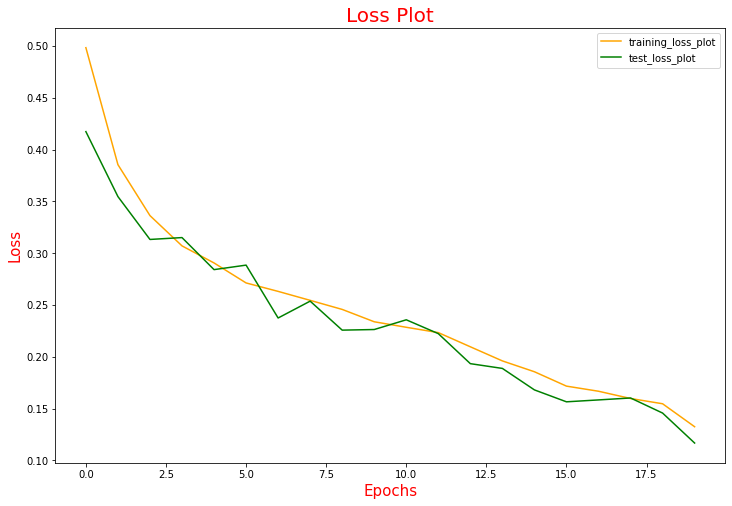

In [59]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8))
plt.plot(loss_plot, color='orange', label = 'training_loss_plot')
plt.plot(test_loss_plot, color='green', label = 'test_loss_plot')
plt.xlabel('Epochs', fontsize = 15, color = 'red')
plt.ylabel('Loss', fontsize = 15, color = 'red')
plt.title('Loss Plot', fontsize = 20, color = 'red')
plt.legend()
plt.show()

In [60]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_feature_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_images(image)[0], 0) 
    img_tensor_val = image_features_extract_model(temp_input) 
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder (img_tensor_val) 

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) 
        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() 
        result.append (tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

In [61]:
def plot_attention_map (caption, weights, image) :

  fig = plt.figure(figsize = (20, 20))
  temp_img = np.array(Image.open(image))

  cap_len = len(caption)
  for cap in range(cap_len) :
    weights_img = np.reshape(weights[cap], (8,8))
    wweights_img = np.array(Image.fromarray(weights_img).resize((224,224), Image.LANCZOS))

    ax = fig.add_subplot(cap_len//2, cap_len//2, cap+1)
    ax.set_title(caption[cap], fontsize = 14, color = 'red')

    img = ax.imshow(temp_img)

    ax.imshow(weights_img, cmap='gist_heat', alpha=0.6, extent=img.get_extent())
    ax.axis('off')
  plt.subplots_adjust(hspace=0.2, wspace=0.2)
  plt.show()

In [62]:
from nltk.translate.bleu_score import sentence_bleu

In [63]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [64]:
image_test = path_test.copy()

In [81]:
def pred_caption_audio(random, autoplay=False, weights=(0.5, 0.5, 0, 0)) :

    cap_test_data = caption_test.copy()
    rid = np.random.randint(0, random)
    #rid = 3
    test_image = image_test[rid]
    #test_image = '/cluster/home/guillera/mode_3_medical/isu-chest-data/archive/gray.jpeg'
    print(rid)
    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test_data[rid] if i not in [0]])
    result, attention_plot, pred_test = evaluate(test_image)
    real_caption=filt_text(real_caption)      
    pred_caption=' '.join(result).rsplit(' ', 1)[0]
    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()
    score = sentence_bleu(reference, candidate, weights=weights)#set your weights
    #print(f"BLEU score: {score*100}")
    #print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    #plot_attention_map(result, attention_plot, test_image)
    #speech = gTTS('Predicted Caption : ' + pred_caption, lang = 'en', slow = False)
    #speech.save('voice.mp3')
    #audio_file = 'voice.mp3'

    #display.display(display.Audio(audio_file, rate = None, autoplay = autoplay))

    return test_image

In [87]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
#Image.open(test_image)

672
Prediction Caption: thoracic vertebrae cardiomegaly pleural effusion pulmonary congestion pulmonary congestion pulmonary congestion pulmonary congestion pulmonary congestion pulmonary congestion pulmonary congestion pulmonary congestion pulmonary congestion pulmonary congestion pulmonary congestion pulmonary congestion pulmonary


/cluster/home/guillera/.local/lib/python3.6/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [88]:
encoder.save_weights('./outputs_encoder')
decoder.save_weights('./outputs_decoder')